# HW1 - Stats 606 - Optimization

**Felipe Maia Polo (maiapolo)**

In [1]:
from hw1 import *

In [2]:
B=100

## Part (a)

### Naive

In [3]:
eta=.0001

###
hist={}
hist['x'], hist['f'], hist['df'], hist['ndf'], hist['H'], hist['eta'] = [], [], [], [], [], []
hist['x'].append(np.array([2,2]))

itera=0

while itera <= B-1:

    evalu = evaluation(hist['x'][-1], 0)
    hist['f'].append(evalu[0])
    hist['df'].append(evalu[1][0])
    hist['ndf'].append(evalu[1][1])
    hist['eta'].append(eta)

    hist['x'].append(hist['x'][-1] - hist['eta'][-1]*hist['df'][-1])
    
    itera+=1

itera

100

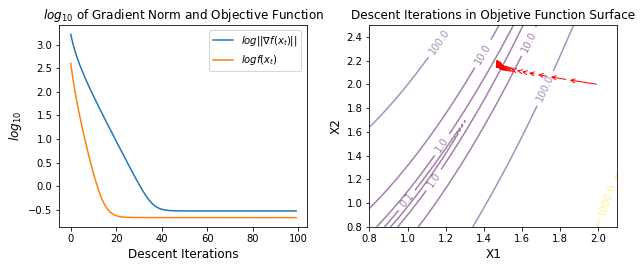

In [4]:
m=100
x = np.linspace(.8,2.1,m)
y = np.linspace(.8,2.5,m)
X, Y = np.meshgrid(x, y)

plots(hist, itera, 'hw1_plot1', X, Y)

In [5]:
hist['f'][-1], hist['ndf'][-1]

(0.21683144024972384, 0.3005932939328052)

### Line Search

In [6]:
def lsearch(a,b,f,hist):
    eta=.1
    x=hist['x'][-1]
    d=hist['df'][-1]
    
    while f(x-eta*d)-f(x)>-a*eta*d.T@d:
        eta=b*eta
        
    return eta

In [7]:
a=.5 #if a is big, b has to be very small, then the convergence is slow
b=.99

###
hist={}
hist['x'], hist['f'], hist['df'], hist['ndf'], hist['H'], hist['eta'] = [], [], [], [], [], []
hist['x'].append(np.array([2,2]))

itera=0

while itera <= B-1:

    evalu = evaluation(hist['x'][-1], 0)
    hist['f'].append(evalu[0])
    hist['df'].append(evalu[1][0])
    hist['ndf'].append(evalu[1][1])
    hist['eta'].append(lsearch(a,b,f,hist))

    hist['x'].append(hist['x'][-1] - hist['eta'][-1]*hist['df'][-1])
    
    itera+=1
   
itera

100

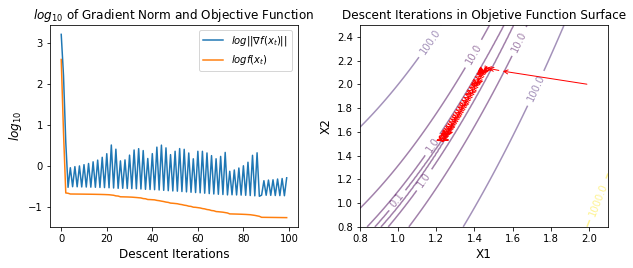

In [8]:
m=100
x = np.linspace(.8,2.1,m)
y = np.linspace(.8,2.5,m)
X, Y = np.meshgrid(x, y)

plots(hist, itera, 'hw1_plot2', X, Y)

In [9]:
hist['f'][-1], hist['ndf'][-1]

(0.054200327764231226, 0.5108843035622489)

## Part (b)

### First idea

In [10]:
###
hist={}
hist['x'], hist['f'], hist['df'], hist['ndf'], hist['H'], hist['eta'] = [], [], [], [], [], []
hist['x'].append(np.array([-1.2,1]))

count=0
itera=0

while count <= B-1:

    evalu = evaluation(hist['x'][-1], count)
    count = evalu[-1]
    hist['f'].append(evalu[0])
    hist['df'].append(evalu[1][0])
    hist['ndf'].append(evalu[1][1])
    hist['H'].append(evalu[2])
    
    if count<=5:
        hist['eta'].append(.0025)
    else:
        hist['eta'].append(hist['df'][-1].T@hist['df'][-1]/(hist['df'][-1].T@hist['H'][-1]@hist['df'][-1]))

    hist['x'].append(hist['x'][-1] - hist['eta'][-1]*hist['df'][-1])  
    
    itera+=1

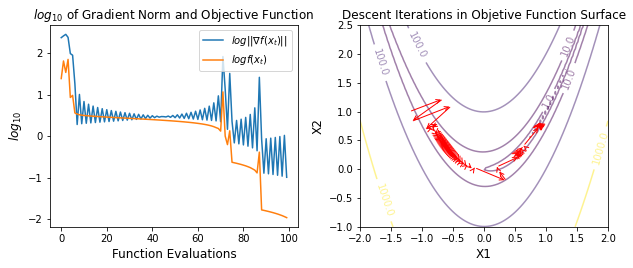

In [11]:
m=100
x = np.linspace(-2,2,m)
y = np.linspace(-1,2.5,m)
X, Y = np.meshgrid(x, y)

plots(hist, itera, 'hw1_plot3_'+str(0), X, Y, partb=True)

In [12]:
hist['f'][-1], hist['ndf'][-1]

(0.01100097000927186, 0.10256783137205136)

### One step ahead

/usr/local/anaconda/envs/stats600/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/Users/maiapolo/Desktop/PhD_Courses/606/hw1.py:43: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(hist['ndf']), label='$log ||\\nabla f(x_t)||$')
/Users/maiapolo/Desktop/PhD_Courses/606/hw1.py:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(hist['f']), label='$log f(x_t)$')


38 37 0.0 0.0 inf inf


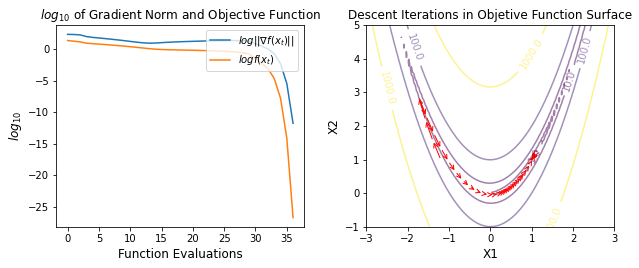

/usr/local/anaconda/envs/stats600/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/Users/maiapolo/Desktop/PhD_Courses/606/hw1.py:43: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(hist['ndf']), label='$log ||\\nabla f(x_t)||$')
/Users/maiapolo/Desktop/PhD_Courses/606/hw1.py:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(hist['f']), label='$log f(x_t)$')


64 63 0.0 0.0 inf inf


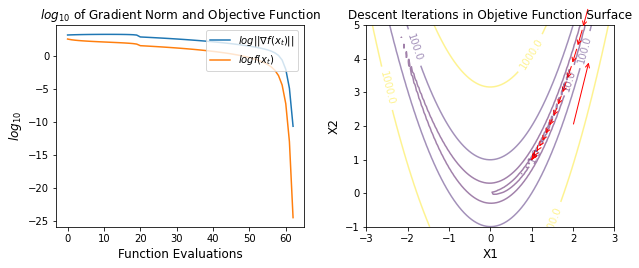

/usr/local/anaconda/envs/stats600/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/Users/maiapolo/Desktop/PhD_Courses/606/hw1.py:43: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(hist['ndf']), label='$log ||\\nabla f(x_t)||$')
/Users/maiapolo/Desktop/PhD_Courses/606/hw1.py:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(hist['f']), label='$log f(x_t)$')


65 64 0.0 0.0 inf inf


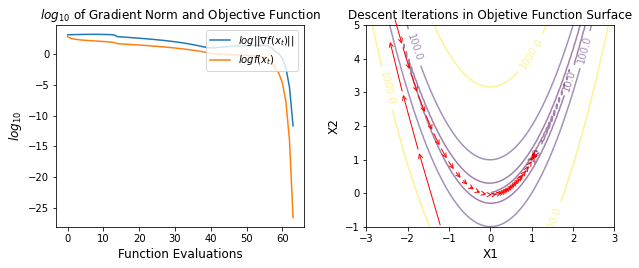

In [13]:
###
x0s=[np.array([-1.2,1]), np.array([2,2]), np.array([-1.2,-1])]

for x0 in x0s:

    hist={}
    hist['x'], hist['f'], hist['df'], hist['ndf'], hist['H'], hist['eta'] = [], [], [], [], [], []
    hist['x'].append(x0)

    count=0
    itera=0
    while count <= B-1:

        evalu = evaluation(hist['x'][-1], count)
        count = evalu[-1]
        hist['f'].append(evalu[0])
        hist['df'].append(evalu[1][0])
        hist['ndf'].append(evalu[1][1])
        hist['H'].append(evalu[2])

        x=hist['x'][-1]
        func=hist['f'][-1]
        grad=hist['df'][-1]
        hess=hist['H'][-1]
        tens=T(hist['x'][-1])

        if func==0: break

        beta=grad.T@grad/(grad.T@hess@grad)
        grad_tilde=grad-beta*hess@grad
        hess_tilde=hess-beta*tens@grad
        alpha=grad_tilde.T@grad_tilde/(grad_tilde.T@hess_tilde@grad_tilde)
        d=beta*grad+alpha*grad_tilde
        eta=d.T@grad/(d.T@hess@d)

        hist['eta'].append(eta)
        hist['x'].append(hist['x'][-1] - hist['eta'][-1]*d)

        itera+=1

    print(count,itera,hist['f'][-1],hist['ndf'][-1], np.log10(1/hist['f'][-1]), np.log10(1/hist['ndf'][-1]))

    m=100
    x = np.linspace(-3,3,m)
    y = np.linspace(-1,5,m)
    X, Y = np.meshgrid(x, y)

    plots(hist, itera, 'hw1_plot3_'+str(x0.tolist()), X, Y, partb=True)